In [1]:
# Import packages
import os,sys
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib
import fiona
import rasterio as rio

from pysptools.material_count.vd import HfcVd
import pysptools.eea as eea 
import pysptools.abundance_maps as amap
import pysptools.classification as cls
import pysptools.material_count as cnt

from earthpy.spatial import bytescale
import earthpy as et

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

In [2]:
# Download wavelength and stacked aoi array data 
url_wavelengths = 'https://ndownloader.figshare.com/files/23262752'
et.data.get_data(url=url_wavelengths, replace=True)

url_stacked_arr = 'https://ndownloader.figshare.com/files/23487062'
et.data.get_data(url=url_stacked_arr, replace=True)

Extracted output to C:\Users\Smells\earth-analytics\data\earthpy-downloads\S07LSAT8_Sagebrush_IH91-1B_BECKa_AREF


'C:\\Users\\Smells\\earth-analytics\\data\\earthpy-downloads\\stacked_aoi.tif'

In [3]:
# Set working directory and other paths
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
stacked_aoi_path = os.path.join("data", "earthpy-downloads", "stacked_aoi.tif")
wavelengths_path = os.path.join("data", "earthpy-downloads", 
                                "S07LSAT8_Sagebrush_IH91-1B_BECKa_AREF",
                                "S07LSAT8_Wavelengths_Landsat8_(7_bands)_microns.txt")

In [4]:
# Read wavelength data as array
wavelengths_micr_arr = np.loadtxt(wavelengths_path, skiprows=1)
wavelengths_micr_arr

# Multiply by 1000 to convert to nanometers
wavelengths_arr = wavelengths_micr_arr * 1000
wavelengths_arr

array([ 442.99144,  483.26388,  561.36143,  654.70088,  864.47239,
       1609.5761 , 2202.0326 ])

In [5]:
# Open stacked array
with rio.open(stacked_aoi_path) as aoi:
    stacked_arr = aoi.read()
    stacked_meta = aoi.meta

print(stacked_arr.shape)

(7, 298, 397)


In [6]:
# Rearranging dimensions order to match HSI cube format
stacked_arr_rolled = np.rollaxis(stacked_arr, 0, 3)
print(stacked_arr_rolled.shape)

stacked_arr_transpose = np.transpose(stacked_arr, (2, 1, 0))
stacked_arr_transpose.shape

(298, 397, 7)


(397, 298, 7)

In [7]:
#####################################################################################
# Testing scalar process (reflectance*10,000)


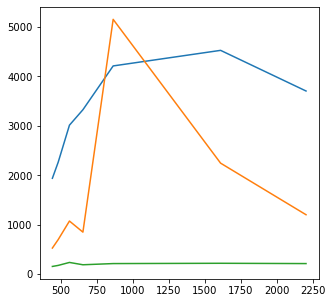

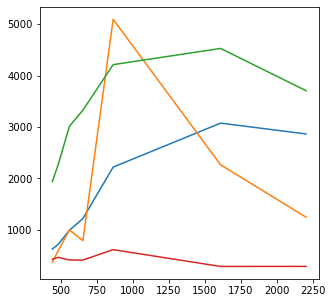

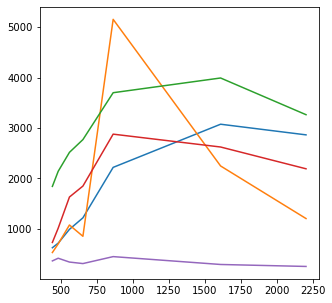

In [8]:
ee = eea.NFINDR()

for n_em in [3,4,5]:
    
    U = ee.extract(stacked_arr_rolled, n_em, maxit=10, normalize=False, ATGP_init=True)
    
    # plot them
    plt.figure(figsize=(5,5))
    for em in U:
        plt.plot(wavelengths_arr, em)
        
#     plt.title(f'Extracted {n_em} Endmembers from NEON Subset')
#     plt.show()

#     # Plot the abundance maps
#     am = amap.FCLS()
#     ab_maps = am.map(stacked_arr_rolled, U, normalize=False)
    
#     for i,em in enumerate(U):
#         fig = plt.figure(figsize=(5,5))
#         gs = gridspec.GridSpec(1, 3, width_ratios=[8, 1, 1]) 

#         ax0 = plt.subplot(gs[0])
#         p0 = ax0.plot(wavelengths_arr, em)
#         ax0.grid(True)

#         ax1 = plt.subplot(gs[1])
#         im1 = ax1.imshow(bytescale(neon_sub_cube.values[:,:,[54, 34, 22]]))

#         ax2 = plt.subplot(gs[2])
#         im2 = ax2.imshow(ab_maps[:,:,i])


#         divider = make_axes_locatable(ax2)
#         cax = divider.append_axes("right", size="15%", pad=0.05)

#         plt.colorbar(im2, cax=cax)
#         plt.show()
